In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
from IPython.core.display import HTML
%matplotlib inline

In [91]:
# read in data
thievery = pd.read_csv("stolen_art_new.csv")
thievery.head()

,title,maker,crimeCategory,primaryMaterial,numMaterials,century,size,units
0,Shakti II,Benjamin Creme,print,lithograph,1,21st,4.227396,square feet
1,Seated Woman,Raphael Soyer,drawing-watercolour,other,2,other,4.276389,square feet
2,Magda and Raymond,Walter Pach,paintings,oil,2,20th,3.334000,square feet
3,Jan,Edna Hibel,print,lithograph,1,20th,NaN,NaN
4,Tiger painting,Michael Ward,paintings,watercolor,1,20th,18.335000,square feet


In [92]:
# get typical kind of work
## broadest category: most common type of work
print(thievery['crimeCategory'].value_counts().head(1))
## characteristics of the typical painting (not including maker since it has the most variability)
print(thievery[thievery['crimeCategory'] == 'paintings']['primaryMaterial'].value_counts().head(1))
print(thievery[thievery['crimeCategory'] == 'paintings']['numMaterials'].value_counts().head(1))
print(thievery[thievery['crimeCategory'] == 'paintings']['century'].value_counts().head(1))
print(thievery[thievery['crimeCategory'] == 'paintings']['units'].value_counts().head(1))

# typical size of 2-dimensional painting
print(thievery[(thievery['crimeCategory'] == 'paintings') & (thievery['units'] == 'square feet')]['size'].mean())

paintings    364
Name: crimeCategory, dtype: int64
oil    253
Name: primaryMaterial, dtype: int64
2    280
Name: numMaterials, dtype: int64
20th    168
Name: century, dtype: int64
square feet    335
Name: units, dtype: int64
6.1479194208955255


In [93]:
# top artists
sns.set_style("darkgrid")
sns.set_palette("colorblind")
plt.figure(figsize=(8,6))

# set list of top artists (only individuals) and number of stolen paintings for each
# dict(thievery['maker'].value_counts())
artists = ['Max Moran', 'Erte', 'Edna Hibel', 'Salvador Dali', 'Henry and Gloria Klar']
top_artists = thievery[thievery['maker'].isin(artists)]['maker'].value_counts().to_frame().reset_index()
print(top_artists)
print(thievery[thievery['maker'] == 'Erte']['crimeCategory'].value_counts())

                   index  maker
0              Max Moran     21
1                   Erte     20
2             Edna Hibel     16
3          Salvador Dali     14
4  Henry and Gloria Klar     11
print                      10
sculpture                   8
other-arts-and-antiques     1
paintings                   1
Name: crimeCategory, dtype: int64


<Figure size 800x600 with 0 Axes>

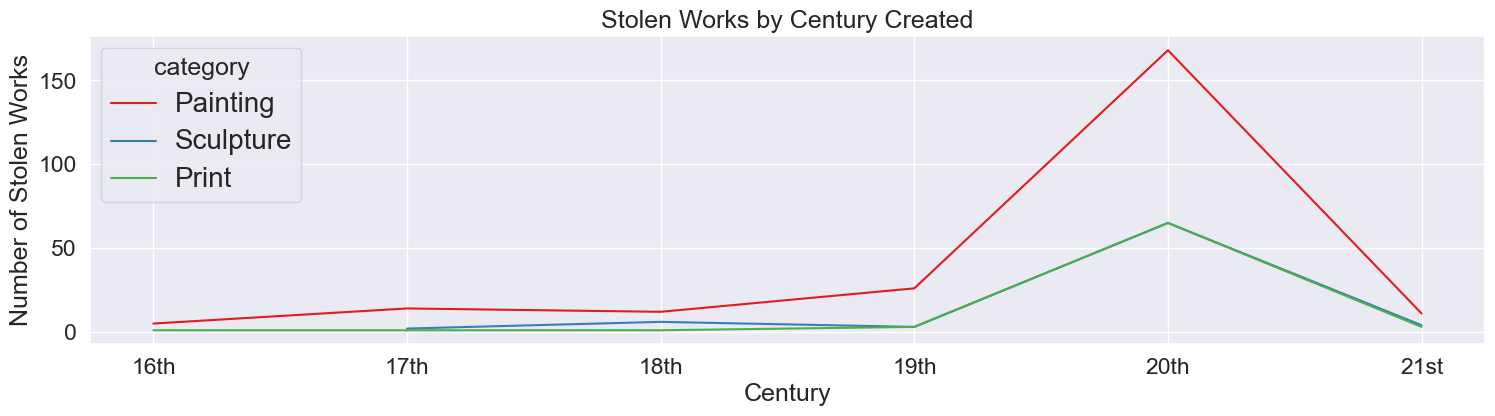

In [94]:
# manually order centuries chronologically and get n(works) for each
century_paint = ['16th', '17th', '18th', '19th', '20th', '21st']
counts_paint = thievery[(thievery['century'] != 'other') & (thievery['crimeCategory'] == 'paintings')]['century'].value_counts()
paint_sort = counts_paint[century_paint]

century_sculpt = ['17th', '18th', '19th', '20th', '21st']
counts_sculpt = thievery[(thievery['century'] != 'other') & (thievery['crimeCategory'] == 'sculpture') & (thievery['century'] != '15th')]['century'].value_counts()
sculpt_sort = counts_sculpt[century_sculpt]


century_print = ['16th', '17th', '18th', '19th', '20th', '21st']
counts_print = thievery[(thievery['century'] != 'other') & (thievery['crimeCategory'] == 'print')]['century'].value_counts()
print_sort = counts_print[century_print]

counts = pd.DataFrame(pd.concat([paint_sort, sculpt_sort, print_sort])).reset_index()
counts['category'] = ["Painting"]*len(counts_paint) + ["Sculpture"]*len(counts_sculpt) + ["Print"]*len(counts_print)

# bar plot
sns.set(font_scale=1.5)
plt.figure(figsize=(18,4))
ax = sns.lineplot(x=counts['index'], y=counts['century'], hue=counts['category'] , palette = 'Set1')
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='18')
ax.set_title('Stolen Works by Century Created')
ax.set_xlabel('Century')
ax.set_ylabel('Number of Stolen Works')
plt.show()

In [95]:
# determine top three crime categories, then top four materials for each
# thievery['crimeCategory'].value_counts()
# thievery[thievery['crimeCategory'] == 'paintings']['primaryMaterial'].value_counts()
# thievery[thievery['crimeCategory'] == 'sculpture']['primaryMaterial'].value_counts()
# thievery[thievery['crimeCategory'] == 'print']['primaryMaterial'].value_counts()

# filter dataset to top crime categories and materials, then get value counts
main_crimes = ['paintings','sculpture','print']
main_materials = ['oil','watercolor','acrylic','gouache', 'bronze','wood','marble','glass', 'lithograph','serigraph','etching','paper']
mini_thievery = thievery[(thievery['crimeCategory'].isin(main_crimes)) & (thievery['primaryMaterial'].isin(main_materials))]
mini_counts = mini_thievery.groupby('crimeCategory')['primaryMaterial'].value_counts().unstack(0)

# only keep value counts for the top 4 materials of each top crime category
mini_counts.loc['acrylic', 'sculpture'] = np.nan
mini_counts.loc[['etching','paper','wood'], 'paintings'] = np.nan

Text(0, 0.5, 'Number of Stolen Works')

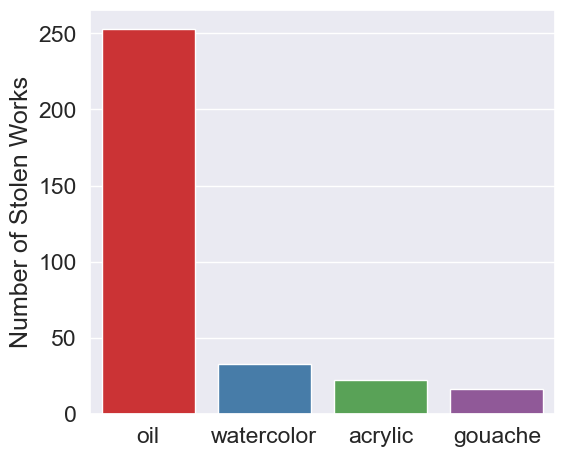

In [96]:
# barchart for painting materials
sns.set(font_scale = 1.5)
plt.figure(figsize=(6,5.25))
ax = sns.barplot(x=mini_counts['paintings'].index, y=mini_counts['paintings'].values, order=['oil', 'watercolor','acrylic','gouache'], palette = 'Set1')
ax.set_xlabel('')
ax.set_ylabel('Number of Stolen Works', fontsize='18')

Text(0, 0.5, 'Number of Stolen Works')

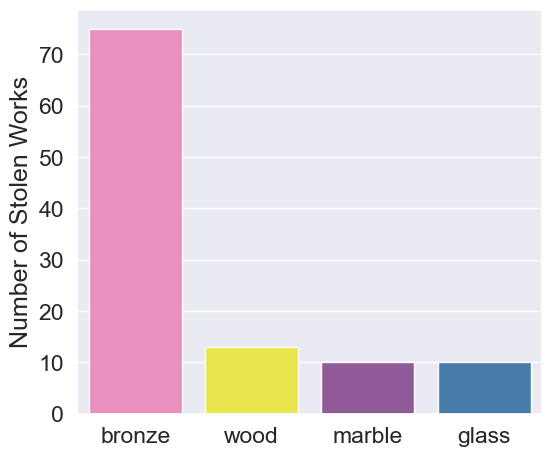

In [97]:
# same process for sculptures
sns.set(font_scale = 1.5)
plt.figure(figsize=(6,5.25))
ax = sns.barplot(x=mini_counts['sculpture'].index, y=mini_counts['sculpture'].values, order=['bronze','wood','marble','glass'], palette = 'Set1_r')
ax.set_xlabel('')
ax.set_ylabel('Number of Stolen Works', fontsize='18')

Text(0, 0.5, 'Number of Stolen Works')

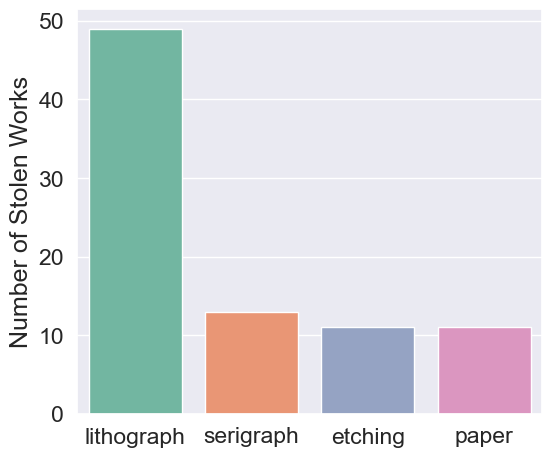

In [98]:
# Same process for prints
sns.set(font_scale = 1.5)
plt.figure(figsize=(6,5.25))
ax = sns.barplot(x=mini_counts['print'].index, y=mini_counts['print'].values, order=['lithograph','serigraph','etching','paper'], palette = 'Set2')
ax.set_xlabel('')
ax.set_ylabel('Number of Stolen Works', fontsize='18')